# Exoloratory data analysis for Haberman Cancer Survival

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [2]:
# reading the dataset
haberman = pd.read_csv("haberman.csv", names=['age', 'year', 'aux_nodes_dect', 'surv_stat'])

In [3]:
haberman.shape

(306, 4)

In [4]:
haberman.columns

Index(['age', 'year', 'aux_nodes_dect', 'surv_stat'], dtype='object')

In [5]:
haberman.head()

,age,year,aux_nodes_dect,surv_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
year              306 non-null int64
aux_nodes_dect    306 non-null int64
surv_stat         306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [7]:
haberman.describe()

,age,year,aux_nodes_dect,surv_stat
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
haberman.surv_stat.value_counts()

1    225
2     81
Name: surv_stat, dtype: int64

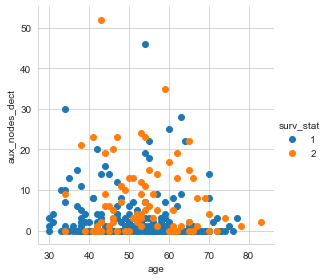

In [9]:
## from layman perspective age and number of aux_nodes can be important so plotting it
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_stat", height=4).map(plt.scatter, "age", "aux_nodes_dect").add_legend();
plt.show()

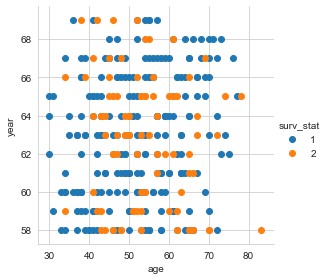

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_stat", height=4).map(plt.scatter, "age", "year").add_legend();
plt.show()

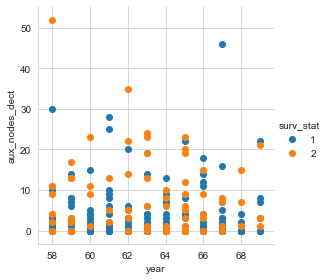

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_stat", height=4).map(plt.scatter, "year", "aux_nodes_dect").add_legend();
plt.show()

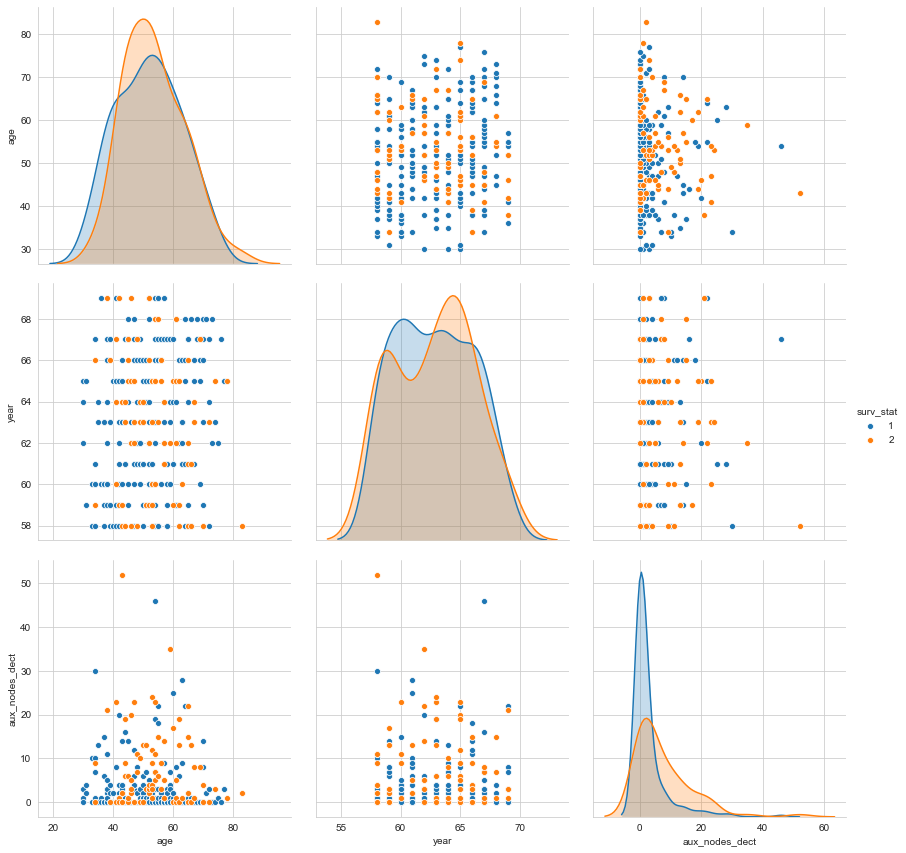

In [12]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_stat", vars=['age', 'year', 'aux_nodes_dect'], height=4);
plt.show()

**Observations**
1. can not use any pair of attribute for classification task. serious overlap in every case.

# univariate analysis using distribution  plot

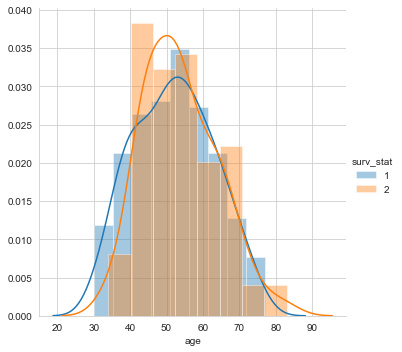

In [13]:
sns.FacetGrid(haberman, hue='surv_stat', height=5).map(sns.distplot, "age").add_legend()
plt.show()

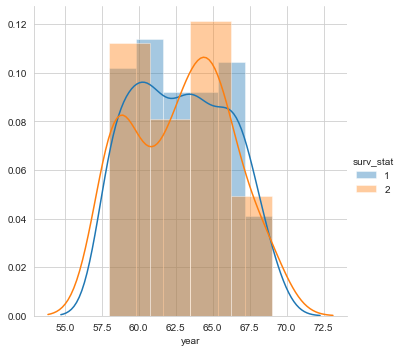

In [14]:
sns.FacetGrid(haberman, hue='surv_stat', height=5).map(sns.distplot, "year").add_legend()
plt.show()

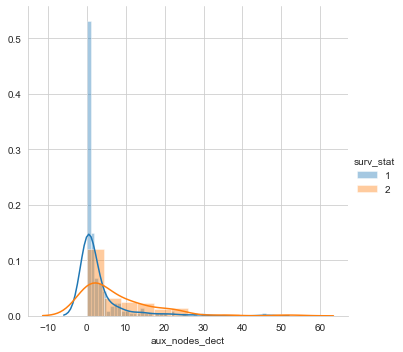

In [15]:
sns.FacetGrid(haberman, hue='surv_stat', height=5).map(sns.distplot, "aux_nodes_dect").add_legend()
plt.show()

In [16]:
st = haberman[haberman["aux_nodes_dect"] <= 2]
print(st[st.surv_stat==1].count(), '\n\n' ,st[st.surv_stat==2].count(), "\n\n", st[st.surv_stat==1].shape[0]/(st[st.surv_stat==1].shape[0]+st[st.surv_stat==1].shape[1]))

age               165
year              165
aux_nodes_dect    165
surv_stat         165
dtype: int64 

 age               32
year              32
aux_nodes_dect    32
surv_stat         32
dtype: int64 

 0.9763313609467456


**Observations**
1. All plots are variable vs count
2. Dist. plot of auxilliary node dectection variable says if aux_nodes_dect is 0 then survival count is more than death.
3. If take some hard decisions say aux_node_dect <= 2 then survival rate is decently higher else not 

# CDF analysis

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


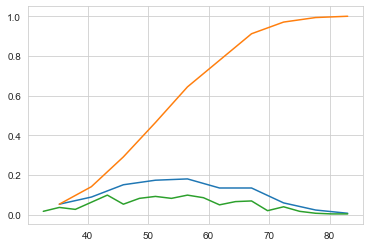

In [17]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman['age'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:], pdf);

plt.show();

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846] [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


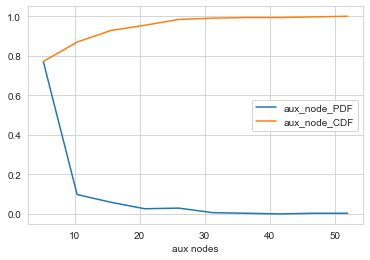

In [18]:
counts, bin_edges = np.histogram(haberman['aux_nodes_dect'], bins=10, density = True)
print(counts, bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['aux_node_PDF', 'aux_node_CDF'])
plt.xlabel("aux nodes")

plt.show();

**Observations**
1. approx. 97% of total people have <=20 aux nodes.

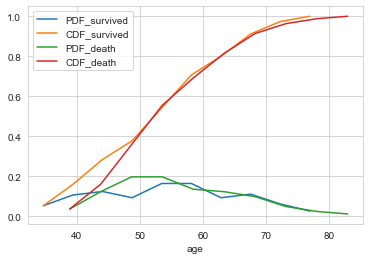

In [19]:
counts, bin_edges = np.histogram(haberman[haberman['surv_stat']==1]['age'], bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman[haberman['surv_stat']==2]['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF_survived', 'CDF_survived', 'PDF_death', 'CDF_death'])
plt.xlabel("age")

plt.show();

**Observations**
1. Plot of PDF and CDF for survived and death of people on basis of count of age.
2. After the age 50 it is pretty difficult like 50-50 chance 

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618] [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417] [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


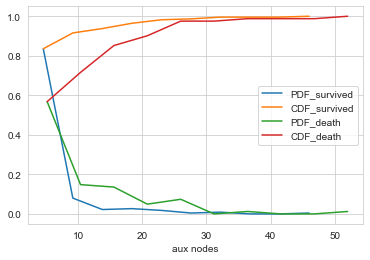

In [20]:
counts, bin_edges = np.histogram(haberman[haberman['surv_stat']==1]['aux_nodes_dect'], bins=10, density = True)
print(counts, bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman[haberman['surv_stat']==2]['aux_nodes_dect'], bins=10, density = True)
print(counts, bin_edges)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF_survived', 'CDF_survived', 'PDF_death', 'CDF_death'])
plt.xlabel("aux nodes")

plt.show();

**Observations**
1. Plot of PDF and CDF for survived and death of people on basis of count of auxilliary nodes.
2. survival rate is more when aux node <=2 than death rate. 
3. As the aux nodes increases the survival rate decreases and the death rates increases.

**So we can consider aux nodes as a prime feature for classification**

# Box-plot and whiskers for better understanding of %tile values


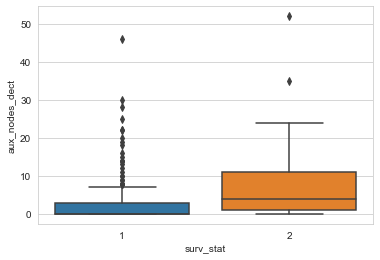

In [21]:
# the box itself is splitted to 25-50-75 %tile values
# the width of the box doesnot mean anything
# the T shaped lines are called whiskers, 
# whiskers = 1.5 x (aux nodes @75%tile - aux nodes @25%tile) or
# whiskers = top:maximum aux nodes and bottom:minimum aux nodes
sns.boxplot(x='surv_stat', y='aux_nodes_dect', data=haberman)
plt.show()

In [24]:
print(np.percentile(haberman[haberman['surv_stat']==2]['aux_nodes_dect'], np.arange(0, 100, 25))) # 0, 25, 50, 75 %tile
percentile75 = np.percentile(haberman[haberman['surv_stat']==2]['aux_nodes_dect'], 75)
percentile25 = np.percentile(haberman[haberman['surv_stat']==2]['aux_nodes_dect'], 25)
IQR = percentile75-percentile25
top_whisker = percentile75+1.5*IQR
bottom_whisker = percentile25-1.5*IQR
print(percentile25, percentile75, top_whisker, bottom_whisker)

[ 0.  1.  4. 11.]
1.0 11.0 26.0 -14.0


**Observations**
1. The 25%tile and 50%tile values overlap @ aux_node = 0 and the 75%tile is at around 3 aux nodes.
2. The 25%tile is at aux node 1, 50%tile values at aux_node = 4 and the 75%tile is at around 11 aux nodes.

# Violin plot : combines adv of smoothed histogram(pdf) and box plot

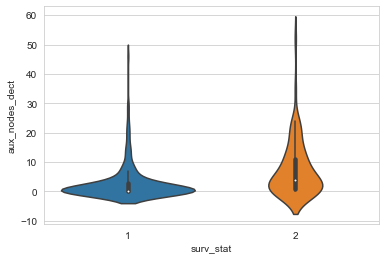

In [25]:
# to use the width of the box plot is used as pdf or smoothed histogram
# the thick black line in the middle is like box plot
# insead of box its like thick black like where 25%tile @bottom 50%tile @eye(white dot) and 75%tile @top of the thick line
# transposed observation of the diagram is the pdf plot of aux nodes
sns.violinplot(x='surv_stat', y='aux_nodes_dect', data=haberman, axis=8)
plt.show()

**Observations**
1. The 25%tile and 50%tile values overlap @ aux_node = 0 and the 75%tile is at around 3 aux nodes.
2. The 25%tile is at aux node 1, 50%tile values at aux_node = 4 and the 75%tile is at around 11 aux nodes.
3. transposed observation says the pdf of count of aux nodes

# Multivariate probability density function, contour plot

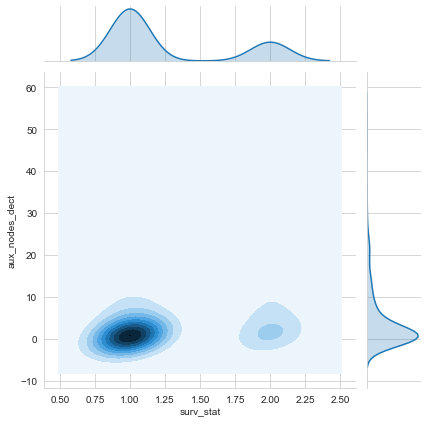

In [26]:
#2D Density plot, contors-plot
sns.jointplot(x ="surv_stat", y="aux_nodes_dect", data=haberman, kind="kde");
plt.show();

**Observations**
1. We can see the deep black area for surv_stat=1, it says more survival @aux node = 0 than the death @ aux node=0.
2. For surv_stat = 1 is bigger than surv_stat=2 because we have more points for 1 than 2.

**Conclusion** ==
If number of axillary node is less,than survival of patients is higher.